In [104]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [105]:
#x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #impulse
#x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
                                              #
x = np.zeros(2**8).astype(int)
x = np.append(x, 8191).astype(int)
x1 = np.zeros(2**8).astype(int)
x = np.append(x, x1)
print(x.size)
feedback = 0

513


In [106]:
out = np.zeros(2**9 + 1).astype(int)
acc1 = 0
acc2 = 0
for i in range (0, 2**9 + 1):
    if(i == 0):
        feedback = 0
    else:
        feedback = out[i-1]
    
    out14 = x[i] - 2*feedback + acc1 + acc2
    acc1 = x[i] - feedback + acc1
    acc2 = x[i] - feedback + acc2
    
    out14_bin = bin(out14)
    #print(len(out14_bin))
    
    #Da bi svi bili 14 bita
    if((out14 > 0) and (len(out14_bin) < 14)):
        out14_bin = "0b" + (14 - len(out14_bin))*"0" + out14_bin[2:]
    if((out14 < 0) and (len(out14_bin) < 15)):
        out14_bin = "-0b" + (14 - len(out14_bin))*"0" + out14_bin[3:]
       
    
    if(out14_bin == "0b0"):
        out14_bin = "0b000000"
        out_bin = 0
    if(out14 > 7):
        out_bin = int(out14_bin[2:5],2)
    if(out14 < -7):
        out_bin = int(out14_bin[3:6],2)
    if(abs(out14) == 1):
        out_bin = 1
    if(abs(out14) == 2):
        out_bin = 2
    if(abs(out14) == 3):
        out_bin = 3
    if(abs(out14) == 4):
        out_bin = 4
    if(abs(out14) == 5):
        out_bin = 5
    if(abs(out14) == 6):
        out_bin = 6
    if(abs(out14) == 7):
        out_bin = 7
    
    if(out14 < 0):
        out_bin = out_bin * (-1)
    out[i] = int(out_bin)    

In [107]:
#out

In [108]:
X = fft(x)
Y = fft(out[:])
#abs(X)

In [109]:
H = Y/X #prenosna funkcija
#H = Y/92
Hdb = 20*np.log(abs(H))

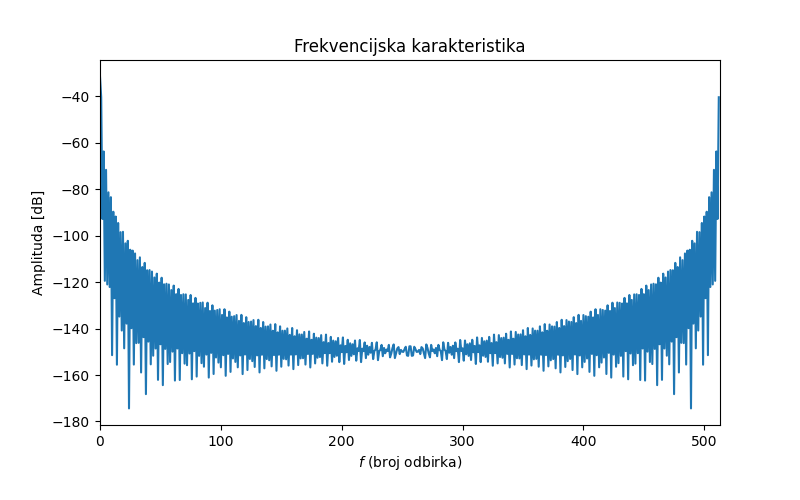

In [110]:
F = np.arange(0,2**9 + 1)
plt.figure(figsize=(8,5))
plt.title("Frekvencijska karakteristika")
plt.xlabel('$f$ (broj odbirka)')
plt.ylabel('Amplituda [dB]')
plt.subplots_adjust(bottom=0.15)
plt.xlim([0,2**9 + 1])
plt.plot(F,Hdb);
plt.show();

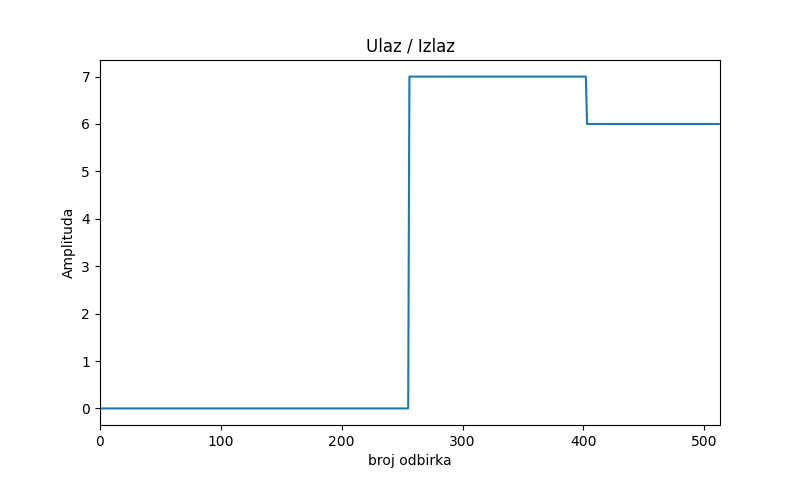

In [111]:
F = np.arange(0,2**9 + 1)
plt.figure(figsize=(8,5))
plt.title("Ulaz / Izlaz")
plt.xlabel('broj odbirka')
plt.ylabel('Amplituda')
plt.subplots_adjust(bottom=0.15)
plt.xlim([0,2**9 + 1])
#plt.xlim([254,259])
#plt.plot(F,x)
plt.plot(F,out)
plt.show();

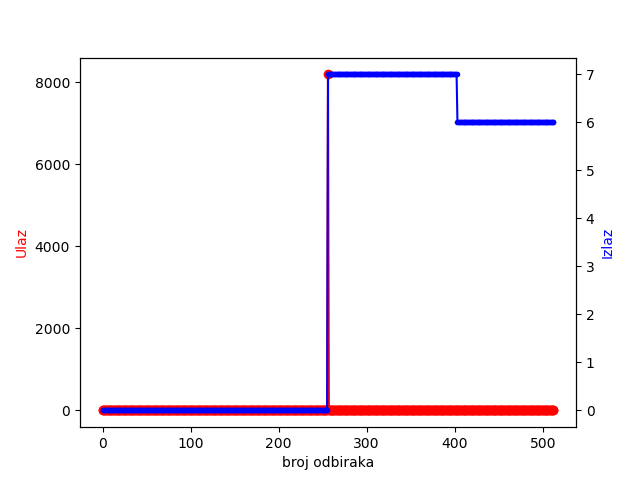

In [112]:
fig,ax = plt.subplots()
ax.plot(F,x, color="red", marker="o")
# set x-axis label
ax.set_xlabel("broj odbiraka")
# set y-axis label
ax.set_ylabel("Ulaz", color="red")

ax2=ax.twinx()
ax2.plot(F, out,color="blue", marker=".")
ax2.set_ylabel("Izlaz",color="blue")
plt.show()

In [74]:
z = "1b1010"
len(z)

'1b1010'

In [77]:
z = "0b" + 2*"10"
z

'0b1010'